In [ ]:
import gradio as gr
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import numpy as np
import sys
sys.prefix = r'C:\Users\patrick\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages'
from ironpdf import *
from pydub import AudioSegment
import librosa.display
import librosa
from music21 import stream,chord,duration,clef,layout

myModel = tf.keras.models.load_model('my_model.h5')
class_names = ['Crash',
 'Crash + KickBass',
 'Crash + Snare',
 'Crash + Snare + KickBass',
 'Crash + Tom',
 'Crash + Tom + KickBass',
 'Hihat',
 'Hihat + KickBass',
 'Hihat + Snare',
 'Hihat + Snare + KickBass',
 'Hihat + Tom',
 'Hihat + Tom + KickBass',
 'KickBass',
 'Ride',
 'Ride + KickBass',
 'Ride + Snare',
 'Ride + Snare + KickBass',
 'Ride + Tom',
 'Ride + Tom + KickBass',
 'Snare',
 'Snare + KickBass',
 'Snare + Tom',
 'Snare + Tom + KickBass',
 'Tom',
 'Tom + KickBass']

def PredictionToNotation(predict):
    score = stream.Score()
    drum_part = stream.Part()
    drum_part.id = 'Drums'
    for prediction in predict:
        n=chord.Chord(PredictionToChord(prediction))
        n.duration = duration.Duration(0.25)
        drum_part.append(n)
    drum_part.clef = clef.PercussionClef()
    drum_part.staffLines = 5
    score.insert(0, drum_part)
    score.write('lily.pdf','notation')
    
    pdf = PdfDocument.FromFile("notation.pdf")
    
    pdf.RasterizeToImageFiles("*.png",DPI=96)

    img = Image.open('1.png')
    return img
def PredictionToChord(prediction):
    noteToChord = []
    drumComponent = {"Hihat":"A4","Snare":"D4","KickBass":"G3","Crash":"B4","Tom":"E4","Ride":"G4"}
    for component in prediction.split(" "):
        if(component in drumComponent):
            noteToChord.append(drumComponent[component])
    return noteToChord  
def GetBeat(y):
    return librosa.beat.beat_track(y)
def GetDuration(y):
    return librosa.get_duration(y)
def get_spectrogram(file):
    y , sr = librosa.load(file)
    stft = librosa.stft(y)
    fig, ax = plt.subplots()
    img = librosa.display.specshow(librosa.amplitude_to_db(stft,ref=np.max),ax=ax)
    return img
def Predict(fileName):
    img = Image.open("specImg.png").convert('RGB')
    img = img.resize((256, 256))
    img_array = np.array(img)
    img_array = img_array.astype(np.float32)
    img_array = np.expand_dims(img_array, axis=0)
    prediction = myModel.predict(img_array)
    score = tf.nn.softmax(prediction[0])
    return class_names[np.argmax(score)]
def transcribe(AudioFile):
    drumPlayed = []
    y,sr  = librosa.load(AudioFile)
    #beat = 60/(GetBeat(y)[0]/2)/4
    beat = 0.25 
    duration = GetDuration(y) 
    startSec = 0 * 1000
    endSec = beat * 1000
    for i in range(int(duration/beat)):
        audioPart = AudioSegment.from_wav(AudioFile)
        audioPart = audioPart[startSec:endSec]
        audioPart.export("part.wav", format="wav")
        get_spectrogram('part.wav')
        plt.savefig("specImg")
        plt.cla()
        plt.close("all")
        drumPlayed.append(Predict("specImg.png"))
        startSec = endSec
        endSec += beat * 1000
        
        

    
    print(drumPlayed) 
    return PredictionToNotation(drumPlayed)
gr.Interface(
    fn=transcribe, 
    inputs=gr.Audio(type="filepath"), 
    outputs="image").launch()

Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


C:\Users\patrick\AppData\Local\Temp\ipykernel_26572\951434051.py:70: FutureWarning: Pass y=[ 0.00047032 -0.00054159 -0.00013399 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.get_duration(y)
C:\Users\patrick\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\librosa\util\decorators.py:88: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  return f(*args, **kwargs)


1/1 [==============================] - 0s 30ms/step
['Ride + KickBass', 'Ride', 'Ride', 'Ride', 'Ride', 'Ride', 'Crash + Tom', 'Crash + Tom + KickBass', 'Crash + Tom + KickBass', 'Crash + Tom + KickBass', 'Crash + Tom', 'Ride', 'Ride', 'Crash + Tom + KickBass', 'Crash + Tom', 'Ride', 'Crash + Tom + KickBass', 'Ride', 'Ride', 'Ride', 'Ride', 'Ride', 'Crash + Tom', 'Crash + Tom + KickBass', 'Ride', 'Crash + Tom + KickBass', 'Crash + Tom', 'Ride', 'Ride', 'Ride', 'Crash + Tom', 'Ride', 'Ride + KickBass', 'Ride', 'Ride', 'Crash + Tom + KickBass', 'Ride', 'Ride', 'Crash + Tom', 'Crash + Tom + KickBass', 'Crash + Tom + KickBass', 'Crash + Tom + KickBass', 'Crash + Tom', 'Crash + Tom + KickBass', 'Ride', 'Ride', 'Crash + Tom', 'Ride', 'Crash + Tom + KickBass', 'Ride', 'Ride', 'Crash + Tom + KickBass', 'Ride', 'Ride', 'Ride', 'Crash + Tom + KickBass', 'Crash + Tom + KickBass', 'Ride', 'Crash + Tom', 'Crash + Tom + KickBass', 'Ride', 'Ride', 'Crash + Tom', 'Ride', 'Crash + Tom + KickBass', 'Rid

: 

In [14]:
import gradio as gr
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import numpy as np
import sys
sys.prefix = r'C:\Users\patrick\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages'
from ironpdf import *
from pydub import AudioSegment
import librosa.display
import librosa
from music21 import stream,chord,duration,clef,layout

myModel = tf.keras.models.load_model('my_model.h5')
class_names = ['Crash',
 'Crash + KickBass',
 'Crash + Snare',
 'Crash + Snare + KickBass',
 'Crash + Tom',
 'Crash + Tom + KickBass',
 'Hihat',
 'Hihat + KickBass',
 'Hihat + Snare',
 'Hihat + Snare + KickBass',
 'Hihat + Tom',
 'Hihat + Tom + KickBass',
 'KickBass',
 'Ride',
 'Ride + KickBass',
 'Ride + Snare',
 'Ride + Snare + KickBass',
 'Ride + Tom',
 'Ride + Tom + KickBass',
 'Snare',
 'Snare + KickBass',
 'Snare + Tom',
 'Snare + Tom + KickBass',
 'Tom',
 'Tom + KickBass']

def PredictionToNotation(predict):
    score = stream.Score()
    drum_part = stream.Part()
    drum_part.id = 'Drums'
    for prediction in predict:
        n=chord.Chord(PredictionToChord(prediction))
        n.duration = duration.Duration(0.25)
        drum_part.append(n)
    drum_part.clef = clef.PercussionClef()
    drum_part.staffLines = 5
    score.insert(0, drum_part)
    score.write('lily.pdf','notation')
    
    pdf = PdfDocument.FromFile("notation.pdf")
    
    pdf.RasterizeToImageFiles("*.png",DPI=96)

    img = Image.open('1.png')
    return img
def PredictionToChord(prediction):
    noteToChord = []
    drumComponent = {"Hihat":"A4","Snare":"D4","KickBass":"G3","Crash":"B4","Tom":"E4","Ride":"G4"}
    for component in prediction.split(" "):
        if(component in drumComponent):
            noteToChord.append(drumComponent[component])
    return noteToChord  
def GetBeat(y):
    return librosa.beat.beat_track(y)
def GetDuration(y):
    return librosa.get_duration(y)
def get_spectrogram(file):
    y , sr = librosa.load(file)
    stft = librosa.stft(y)
    fig, ax = plt.subplots()
    img = librosa.display.specshow(librosa.amplitude_to_db(stft,ref=np.max),ax=ax)
    return img
def Predict(fileName):
    img = Image.open("specImg.png").convert('RGB')
    img = img.resize((256, 256))
    img_array = np.array(img)
    img_array = img_array.astype(np.float32)
    img_array = np.expand_dims(img_array, axis=0)
    prediction = myModel.predict(img_array)
    score = tf.nn.softmax(prediction[0])
    return class_names[np.argmax(score)]
def transcribe(AudioFile):
    drumPlayed = []
    y,sr  = librosa.load(AudioFile)
    #beat = 60/(GetBeat(y)[0]/2)/4
    beat = 0.5 
    duration = GetDuration(y) 
    startSec = 0 * 1000
    endSec = beat * 1000
    for i in range(int(duration/beat)):
        audioPart = AudioSegment.from_wav(AudioFile)
        audioPart = audioPart[startSec:endSec]
        audioPart.export("part.wav", format="wav")
        get_spectrogram('part.wav')
        plt.savefig("specImg")
        plt.cla()
        plt.close("all")
        drumPlayed.append(Predict("specImg.png"))
        startSec = endSec
        endSec += beat * 1000
        
        

    
    print(drumPlayed) 
    return PredictionToNotation(drumPlayed)

C:\Users\patrick\AppData\Local\Temp\ipykernel_26572\538734515.py:70: FutureWarning: Pass y=[8.1046699e-07 2.3791805e-05 1.9594929e-04 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.get_duration(y)


1/1 [==============================] - 0s 26ms/step
['Crash + Tom + KickBass', 'Tom', 'Ride', 'Crash + Tom', 'Crash + Tom + KickBass', 'KickBass', 'Crash + KickBass', 'Crash + Tom + KickBass', 'Crash + Tom + KickBass', 'Tom', 'Ride', 'Crash + Tom', 'Crash + KickBass', 'Ride + Tom + KickBass', 'Ride', 'Tom', 'Crash + Tom + KickBass', 'Crash + Tom', 'Crash + KickBass', 'Crash + Tom', 'Crash + Tom + KickBass', 'Crash + Tom + KickBass', 'Crash + KickBass', 'Tom + KickBass', 'Crash + Tom + KickBass', 'Crash + Tom', 'Crash + KickBass', 'Crash + Tom', 'Crash + Tom + KickBass', 'Crash + Tom + KickBass', 'Crash + KickBass', 'Tom + KickBass', 'Crash + Tom + KickBass', 'Crash + Tom', 'Crash + KickBass', 'Crash + Tom', 'Crash + Tom + KickBass', 'KickBass', 'Ride', 'Tom', 'Crash + Tom + KickBass', 'Tom', 'Ride', 'Crash + Tom', 'Crash + Tom + KickBass', 'Crash + Tom + KickBass', 'Crash + KickBass', 'Tom + KickBass', 'Ride', 'Ride', 'Ride', 'Ride', 'KickBass', 'KickBass']


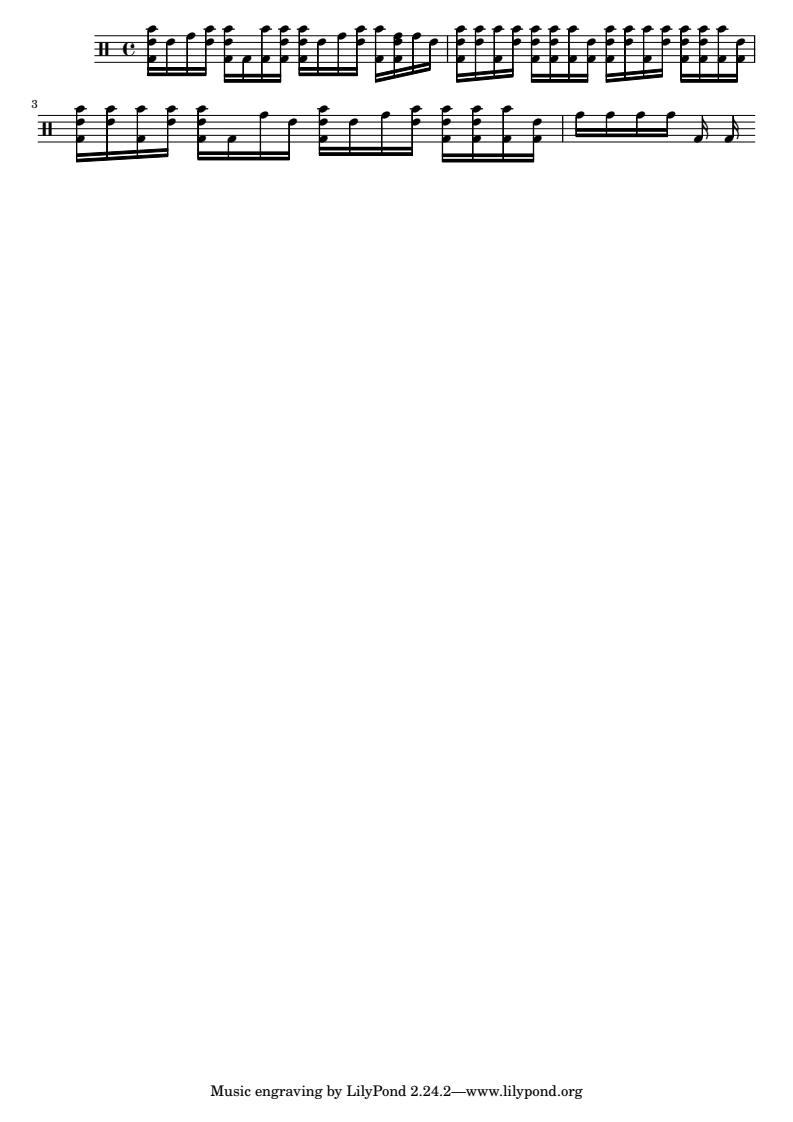

In [15]:
transcribe('test04.wav')